<a href="https://colab.research.google.com/github/Kongheechul/Kaggle_study/blob/main/%EB%8D%B0%EC%9D%B4%EC%BD%98_%EC%86%8C%EB%B9%84%EC%9E%90_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('/content/train.csv')

In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
sample_data = pd.read_csv('/content/sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

In [ ]:
train.describe()

,id,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,553.500000,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,0.069495,0.085740,0.072202,0.068592,0.015343,0.009025,0.141697,617.121841
std,319.996354,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,0.254408,0.280106,0.258939,0.252873,0.122968,0.094614,0.348896,603.587972
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,276.750000,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000
50%,553.500000,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.000000
75%,830.250000,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.750000
max,1107.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


In [ ]:
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [ ]:
train.columns


Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target'],
      dtype='object')

In [ ]:
train.shape

(1108, 22)

In [ ]:
train['Education'].unique()

array(['Master', 'Graduation', 'Basic', 'PhD', '2n Cycle'], dtype=object)

In [ ]:
train.isnull().sum()

id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
target                 0
dtype: int64

In [ ]:
train['Age'] = 2022-train['Year_Birth'] + 1
test['Age'] = 2022-test['Year_Birth'] + 1

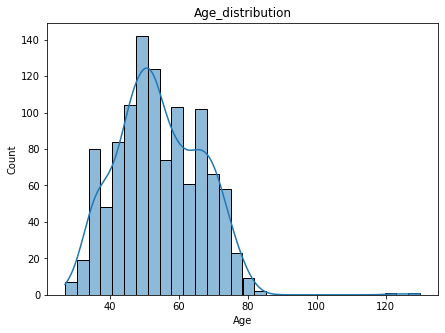

In [ ]:
plt.figure(figsize=(7,5))

sns.histplot(data = train, x='Age',kde= True)
plt.title('Age_distribution')

plt.show()

In [ ]:
train.loc[train['Age'] >= 100]


,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Age
760,760,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,1,...,5,0,0,0,0,0,1,0,65,123
865,865,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,1,...,4,0,0,0,0,0,0,0,22,130


In [ ]:
print(train.shape)

(1108, 23)


In [ ]:
train.drop(axis=0,index = [760,865],inplace=True)
print(train.shape)

(1106, 23)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 0 to 1107
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1106 non-null   int64  
 1   Year_Birth           1106 non-null   int64  
 2   Education            1106 non-null   object 
 3   Marital_Status       1106 non-null   object 
 4   Income               1106 non-null   float64
 5   Kidhome              1106 non-null   int64  
 6   Teenhome             1106 non-null   int64  
 7   Dt_Customer          1106 non-null   object 
 8   Recency              1106 non-null   int64  
 9   NumDealsPurchases    1106 non-null   int64  
 10  NumWebPurchases      1106 non-null   int64  
 11  NumCatalogPurchases  1106 non-null   int64  
 12  NumStorePurchases    1106 non-null   int64  
 13  NumWebVisitsMonth    1106 non-null   int64  
 14  AcceptedCmp3         1106 non-null   int64  
 15  AcceptedCmp4         1106 non-null   i

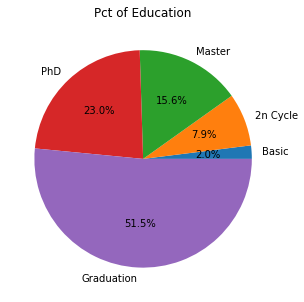

In [ ]:
x = train['Education'].value_counts().sort_values()
labels = train['Education'].value_counts().sort_values().index


plt.figure(figsize=(5, 5))
plt.pie(x=x,labels = labels, autopct = '%.1f%%')
plt.title('Pct of Education')
plt.show()

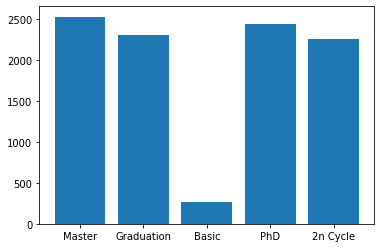

(2000.0, 3000.0)

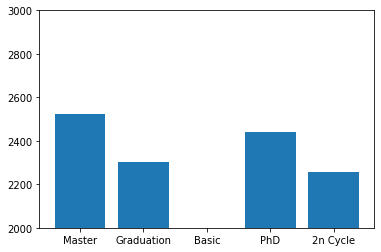

In [ ]:
plt.bar(train['Education'],train['target'])
plt.show()
plt.bar(train['Education'],train['target'])
plt.ylim(2000,3000)

In [ ]:
train['Education'].replace({"2n Cycle" : "Graduate","Master" : "Post Graduate", "PhD" : "Post Graduate"},inplace = True)

In [ ]:
test['Education'].replace({"2n Cycle" : "Graduate","Master" : "Post Graduate", "PhD" : "Post Graduate"},inplace = True)

In [ ]:
train['Marital_Status'].unique()

array(['Together', 'Single', 'Married', 'Widow', 'Divorced', 'Alone',
       'YOLO', 'Absurd'], dtype=object)

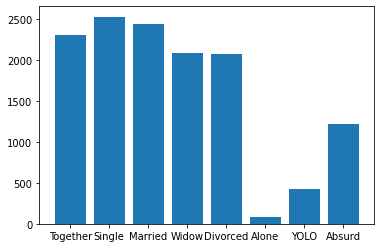

In [ ]:
plt.bar(train['Marital_Status'],train['target'])
plt.show()

In [ ]:
train['Marital_Status']=train['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':
                                                         'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

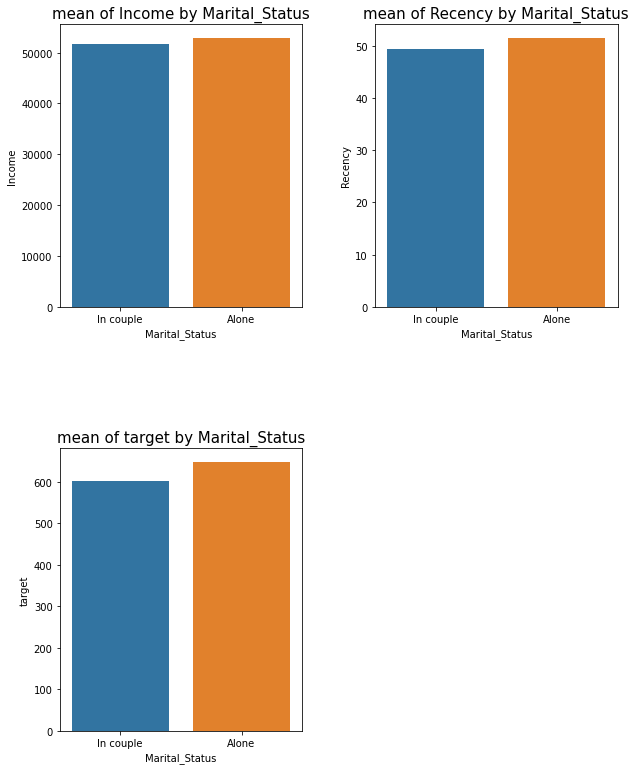

In [ ]:
y_barplot = ['Income','Recency','target']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10, 13))
axes = axes.flatten()

for col, ax in zip(y_barplot, axes):
    ax = sns.barplot(data = train, x = 'Marital_Status', y = col, ax = ax,
                order = ['In couple', 'Alone'], ci = None)
    ax.set_title(f'mean of {col} by Marital_Status', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
    
  
axes[-1].axis('off') 
plt.show()

In [ ]:
train.drop(['Marital_Status'], axis = 1, inplace = True)
test.drop(['Marital_Status'], axis = 1, inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1106 non-null   int64  
 1   Year_Birth           1106 non-null   int64  
 2   Education            1106 non-null   object 
 3   Income               1106 non-null   float64
 4   Kidhome              1106 non-null   int64  
 5   Teenhome             1106 non-null   int64  
 6   Dt_Customer          1106 non-null   object 
 7   Recency              1106 non-null   int64  
 8   NumDealsPurchases    1106 non-null   int64  
 9   NumWebPurchases      1106 non-null   int64  
 10  NumCatalogPurchases  1106 non-null   int64  
 11  NumStorePurchases    1106 non-null   int64  
 12  NumWebVisitsMonth    1106 non-null   int64  
 13  AcceptedCmp3         1106 non-null   int64  
 14  AcceptedCmp4         1106 non-null   int64  
 15  AcceptedCmp5         1106 non-null   i

In [ ]:
train[['Income','target']].corr()

,Income,target
Income,1.000000,0.784704
target,0.784704,1.000000


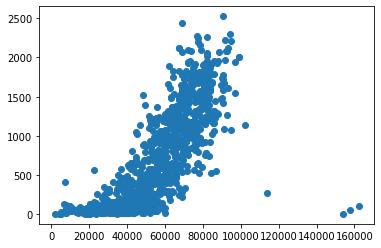

In [ ]:
plt.scatter(train['Income'],train['target'])
plt.show()

In [ ]:
train.loc[train['Income'] >= 110000]

,id,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Age
246,246,1976,Post Graduate,162397.0,1,1,03-06-2013,31,0,0,...,1,0,0,0,0,0,0,0,107,47
686,686,1975,Graduation,153924.0,0,0,07-02-2014,81,0,0,...,0,0,0,0,0,0,0,0,6,48
730,730,1971,Post Graduate,157733.0,1,0,04-06-2013,37,0,1,...,1,0,0,0,0,0,0,0,59,52
892,892,1945,Post Graduate,113734.0,0,0,28-05-2014,9,0,27,...,1,0,0,0,0,0,0,0,277,78


In [ ]:
print(train.shape)

(1106, 22)


In [ ]:
train.drop(axis=0,index = [730,892,686,246],inplace=True)
print(train.shape)

(1102, 22)


In [ ]:
train[['Kidhome','target']].corr()

,Kidhome,target
Kidhome,1.00000,-0.54006
target,-0.54006,1.00000


In [ ]:
train[['Teenhome','target']].corr()

,Teenhome,target
Teenhome,1.00000,-0.11111
target,-0.11111,1.00000


In [ ]:
train.drop(['Teenhome'], axis = 1, inplace = True)
test.drop(['Teenhome'], axis = 1, inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1107
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1102 non-null   int64  
 1   Year_Birth           1102 non-null   int64  
 2   Education            1102 non-null   object 
 3   Income               1102 non-null   float64
 4   Kidhome              1102 non-null   int64  
 5   Dt_Customer          1102 non-null   object 
 6   Recency              1102 non-null   int64  
 7   NumDealsPurchases    1102 non-null   int64  
 8   NumWebPurchases      1102 non-null   int64  
 9   NumCatalogPurchases  1102 non-null   int64  
 10  NumStorePurchases    1102 non-null   int64  
 11  NumWebVisitsMonth    1102 non-null   int64  
 12  AcceptedCmp3         1102 non-null   int64  
 13  AcceptedCmp4         1102 non-null   int64  
 14  AcceptedCmp5         1102 non-null   int64  
 15  AcceptedCmp1         1102 non-null   i

In [ ]:
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.Dt_Customer:
        year_point, month_point, day_point = date.split('-') # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

year, month, day = seperate_datetime(train)
    
train['year'] = year
train['month'] = month
train['day'] = day

train.head()

,id,Year_Birth,Education,Income,Kidhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Age,year,month,day
0,0,1974,Post Graduate,46014.0,1,21-01-2013,21,10,7,1,...,0,0,0,0,0,541,49,21,1,2013
1,1,1962,Graduation,76624.0,0,24-05-2014,68,1,5,10,...,0,0,0,0,0,899,61,24,5,2014
2,2,1951,Graduation,75903.0,0,08-04-2013,50,2,6,6,...,0,0,0,0,0,901,72,8,4,2013
3,3,1974,Basic,18393.0,1,29-03-2014,2,2,3,0,...,0,0,0,0,0,50,49,29,3,2014
4,4,1946,Post Graduate,64014.0,2,10-06-2014,56,7,8,2,...,0,1,0,0,0,444,77,10,6,2014


In [ ]:
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.Dt_Customer:
        year_point, month_point, day_point = date.split('-') # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

year, month, day = seperate_datetime(test)
    
test['year'] = year
test['month'] = month
test['day'] = day

test.head()

,id,Year_Birth,Education,Income,Kidhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,year,month,day
0,0,1979,Graduation,57537.0,1,10-06-2013,83,4,4,3,...,0,0,0,0,0,0,44,10,6,2013
1,1,1955,Graduation,65748.0,0,15-04-2013,58,2,2,4,...,0,0,0,0,1,0,68,15,4,2013
2,2,1984,Graduation,55434.0,1,05-10-2013,21,3,5,3,...,0,0,0,0,0,0,39,5,10,2013
3,3,1960,Graduation,67716.0,0,10-01-2013,8,4,7,4,...,1,0,0,0,0,0,63,10,1,2013
4,4,1976,Graduation,85606.0,0,12-11-2012,89,2,6,7,...,0,0,1,0,0,0,47,12,11,2012


In [ ]:
train = train.drop('Dt_Customer', axis = 1)
test = test.drop('Dt_Customer', axis = 1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1107
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1102 non-null   int64  
 1   Year_Birth           1102 non-null   int64  
 2   Education            1102 non-null   object 
 3   Income               1102 non-null   float64
 4   Kidhome              1102 non-null   int64  
 5   Recency              1102 non-null   int64  
 6   NumDealsPurchases    1102 non-null   int64  
 7   NumWebPurchases      1102 non-null   int64  
 8   NumCatalogPurchases  1102 non-null   int64  
 9   NumStorePurchases    1102 non-null   int64  
 10  NumWebVisitsMonth    1102 non-null   int64  
 11  AcceptedCmp3         1102 non-null   int64  
 12  AcceptedCmp4         1102 non-null   int64  
 13  AcceptedCmp5         1102 non-null   int64  
 14  AcceptedCmp1         1102 non-null   int64  
 15  AcceptedCmp2         1102 non-null   i

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Income               1108 non-null   float64
 4   Kidhome              1108 non-null   int64  
 5   Recency              1108 non-null   int64  
 6   NumDealsPurchases    1108 non-null   int64  
 7   NumWebPurchases      1108 non-null   int64  
 8   NumCatalogPurchases  1108 non-null   int64  
 9   NumStorePurchases    1108 non-null   int64  
 10  NumWebVisitsMonth    1108 non-null   int64  
 11  AcceptedCmp3         1108 non-null   int64  
 12  AcceptedCmp4         1108 non-null   int64  
 13  AcceptedCmp5         1108 non-null   int64  
 14  AcceptedCmp1         1108 non-null   int64  
 15  AcceptedCmp2         1108 non-null   i

In [ ]:
train[['Recency','target']].corr()

,Recency,target
Recency,1.000000,0.051077
target,0.051077,1.000000


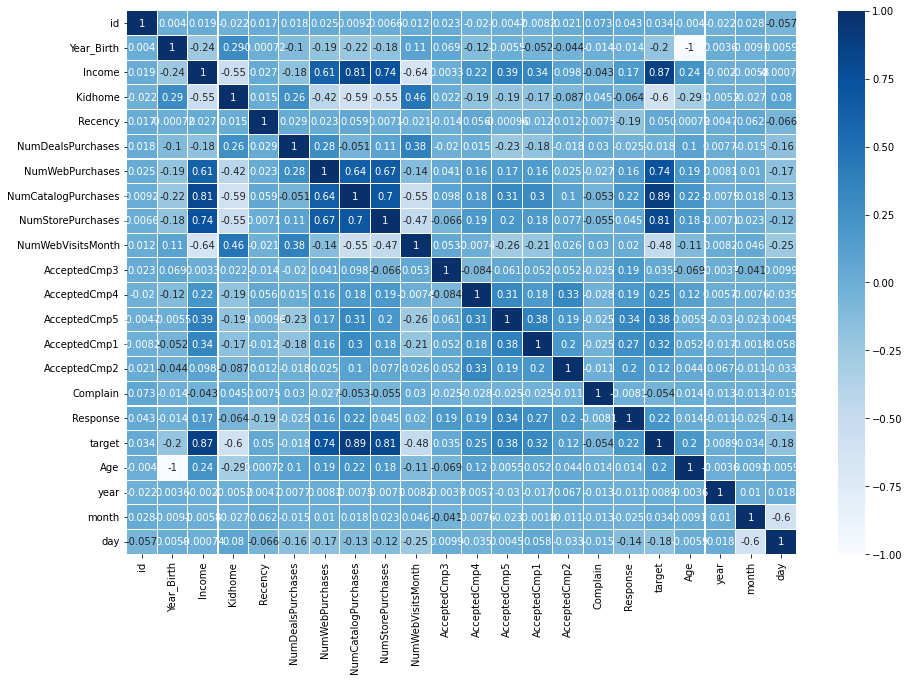

In [ ]:
train_corr = train.corr(method="spearman")
plt.figure(figsize=(15,10))
sns.heatmap(train_corr, vmin=-1, vmax=1, cmap="Blues", annot=True, linewidth=0.1)

In [ ]:
train = train.drop('Recency', axis = 1)
test = test.drop('Recency', axis =1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1102 non-null   int64  
 1   Year_Birth           1102 non-null   int64  
 2   Education            1102 non-null   object 
 3   Income               1102 non-null   float64
 4   Kidhome              1102 non-null   int64  
 5   NumDealsPurchases    1102 non-null   int64  
 6   NumWebPurchases      1102 non-null   int64  
 7   NumCatalogPurchases  1102 non-null   int64  
 8   NumStorePurchases    1102 non-null   int64  
 9   NumWebVisitsMonth    1102 non-null   int64  
 10  AcceptedCmp3         1102 non-null   int64  
 11  AcceptedCmp4         1102 non-null   int64  
 12  AcceptedCmp5         1102 non-null   int64  
 13  AcceptedCmp1         1102 non-null   int64  
 14  AcceptedCmp2         1102 non-null   int64  
 15  Complain             1102 non-null   i

In [ ]:
train = train.drop('Complain', axis = 1)
test = test.drop('Complain', axis =1)

In [ ]:
print(train.shape)

(1102, 21)


In [ ]:
print(test.shape)

(1108, 20)


In [ ]:
train = train.drop('id', axis = 1)

In [ ]:
test = test.drop('id', axis = 1)

In [ ]:
y_train = train['target']

In [ ]:
train = train.drop('target', axis = 1)

In [ ]:
x_train = train

In [ ]:
x_test = test

In [ ]:
x_train.shape

(1102, 19)

In [ ]:
y_train.shape

(1102,)

**모델 선택**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x_train['Education'] = le.fit_transform(x_train['Education'].values)
x_test['Education'] = le.transform(x_test['Education'].values)

In [ ]:
#print(x_train['Education'].unique)

<bound method Series.unique of 0       Post Graduate
1          Graduation
2          Graduation
3               Basic
4       Post Graduate
            ...      
1103       Graduation
1104       Graduation
1105    Post Graduate
1106       Graduation
1107    Post Graduate
Name: Education, Length: 1102, dtype: object>


In [ ]:
#x_train = pd.get_dummies(x_train)
#x_test = pd.get_dummies(x_test)

#print(x_train.columns)
#print(x_test.columns)

Index(['Year_Birth', 'Income', 'Kidhome', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Age', 'year', 'month',
       'day', 'Education_Basic', 'Education_Graduate', 'Education_Graduation',
       'Education_Post Graduate'],
      dtype='object')
Index(['Year_Birth', 'Income', 'Kidhome', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Age', 'year', 'month',
       'day', 'Education_Basic', 'Education_Graduate', 'Education_Graduation',
       'Education_Post Graduate'],
      dtype='object')


In [ ]:
x_train.head()

,Year_Birth,Income,Kidhome,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,...,AcceptedCmp2,Response,Age,year,month,day,Education_Basic,Education_Graduate,Education_Graduation,Education_Post Graduate
0,1974,46014.0,1,10,7,1,8,7,0,0,...,0,0,49,21,1,2013,0,0,0,1
1,1962,76624.0,0,1,5,10,7,1,1,0,...,0,0,61,24,5,2014,0,0,1,0
2,1951,75903.0,0,2,6,6,9,3,0,0,...,0,0,72,8,4,2013,0,0,1,0
3,1974,18393.0,1,2,3,0,3,8,0,0,...,0,0,49,29,3,2014,1,0,0,0
4,1946,64014.0,2,7,8,2,5,7,0,0,...,0,0,77,10,6,2014,0,0,0,1


In [ ]:
##scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [ ]:
#from sklearn.model_selection import cross_validate, StratifiedKFold

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators= 100,max_depth=10, random_state=0)

In [ ]:
#final_model = cross_validate(model,x_train,y_train, cv = StratifiedKFold(n_splits = 5, shuffle = True))
#final_model

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'fit_time': array([0.18140292, 0.17792535, 0.19223571, 0.17703223, 0.17747188]),
 'score_time': array([0.01239371, 0.0106039 , 0.01148009, 0.01062512, 0.010674  ]),
 'test_score': array([0.8176089 , 0.8183849 , 0.80022246, 0.77830573, 0.79392605])}

In [ ]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred.shape

(1108,)

In [ ]:
sample_data['target'] = y_pred
sample_data.to_csv("sample_submission.csv",index=False)